In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys, os, re, time
import numpy as np
import cv2


In [89]:
!adb forward tcp:9999 tcp:57845
import android
droide=android.Android()

In [71]:
droide.ttsSpeak("aqui estoy")

Result(id=0, result=None, error=None)

In [7]:
import android

droid = android.Android()
droid.smsSend("2281774508","algun mensaje . . .")


Result(id=0, result=None, error=None)

In [41]:
!adb devices

List of devices attached
08d7069a	device



In [107]:
!adb forward tcp:9999 tcp:42080
import android
 

droide=android.Android()
droide.startSensingTimed(4, 50)

Result(id=0, result=None, error=None)

In [97]:

luz = droide.sensorsGetLight()
infoIluminacion = "Iluminacion: %s" %luz[1]
print infoIluminacion
droide.stopSensing()


Iluminacion: 29


Result(id=2, result=None, error=None)

In [91]:
s3

47

In [32]:
!adb forward tcp:9999 tcp:57059
import android
#Importar sleep
from time import sleep

droid=android.Android()
droid.ttsSpeak("aqui estoy")
droid.startSensingTimed(1,30000)
 
precision = droid.sensorsGetAccuracy()
luz = droid.sensorsGetLight()
 
#Se desactiva el sensor del celular 
droid.stopSensing()
#Se crea variables de texto con un formato para mostrar la información
 
infoPrecision = "Precision: %s " %precision[1]
infoIluminacion = "Iluminacion: %s" %luz[1]
 
#Se presenta la información en pantalla. 
droid.dialogCreateAlert("Informacion del sensor del celular")
datos = [infoPrecision,infoIluminacion]
droid.dialogSetItems(datos)
droid.dialogSetNegativeButtonText('Salir')
droid.dialogShow()
respuesta  = droid.dialogGetResponse().result
if  respuesta['which'] == "negative":
    droid.makeToast("Saliendo del programa")
    time.sleep(2)

ValueError: No JSON object could be decoded

In [108]:
!adb forward tcp:9999 tcp:56480
import android
droide=android.Android()
droide.ttsSpeak("aqui estoy")

Result(id=0, result=None, error=None)

In [109]:
delay=droide.dialogGetInput(
'Entrada 1', 'Demora antes de iniciar?', '1').result

numOfShots=droide.dialogGetInput(
'Entrada 2','Total de imagenes a capturar','10').result
delayBetweenShots=droide.dialogGetInput(
'Entrada 3', 'Demora(segs) entre capturas?','2').result

In [110]:
droide.ttsSpeak('tomando fotos en '+delay+'segundos')
time.sleep(int(delay))
counter=1
droide.ttsSpeak('Tomando foto')

while counter <= int (numOfShots):
    droide.cameraCapturePicture('/sdcard/DCIM/CAMERA/SENSOR/foto_'+str(counter)+'_.jpg',1,1)
    counter +=1
    if counter != int (numOfShots):
        time.sleep(int(delayBetweenShots))
print 'Hecho sin errores...'
droide.ttsSpeak('Termminado sin errores')

del droide

Hecho sin errores...


In [111]:
!adb pull /sdcard/DCIM/CAMERA/SENSOR/ ./

pull: building file list...
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_10_.jpg -> ./foto_10_.jpg
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_9_.jpg -> ./foto_9_.jpg
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_8_.jpg -> ./foto_8_.jpg
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_7_.jpg -> ./foto_7_.jpg
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_6_.jpg -> ./foto_6_.jpg
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_5_.jpg -> ./foto_5_.jpg
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_4_.jpg -> ./foto_4_.jpg
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_3_.jpg -> ./foto_3_.jpg
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_2_.jpg -> ./foto_2_.jpg
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_1_.jpg -> ./foto_1_.jpg
10 files pulled. 0 files skipped.
1364 KB/s (691676 bytes in 0.495s)


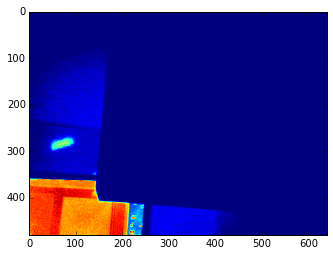

In [138]:
pic=os.path.join('.','foto_4_.jpg')

img=cv2.imread(pic, 0)

pic=os.path.join('.','foto_1_.jpg')

img2=cv2.imread(pic, 0)

#gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#plt.imshow(img)

#plt.imshow(img2)
 

2


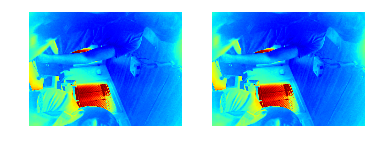

0.0
4


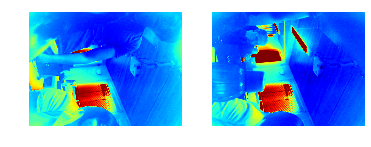

632.276282552
Ubo movimiento...
6


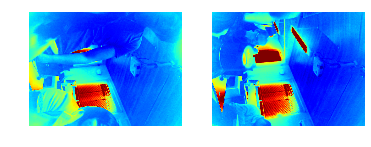

695.448844401
Ubo movimiento...
8


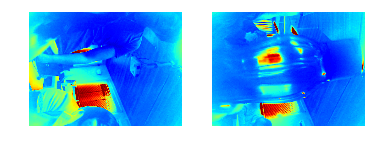

724.353164063
Ubo movimiento...
10


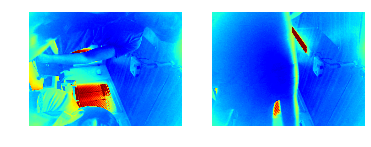

878.440914714
Ubo movimiento...
Hecho sin errores...


Result(id=3, result=None, error=None)

In [29]:
counter=1
pic=os.path.join('.','foto_2_.jpg')
img=cv2.imread(pic, 0)


while counter <= int (numOfShots):
    if counter != int (numOfShots):
        

        pic=os.path.join('.','foto_'+str(counter+1)+'_.jpg')
        print counter+1
        img2=cv2.imread(pic, 0)

        
        compare_images(img,img2,'titulo')
        valor=mse(img,img2)
        if valor>500:
            print 'Ubo movimiento...'
        counter +=2
         
print 'Hecho sin errores...'
droide.ttsSpeak('Termminado sin errores')

CODIGO PARA ROTAR LA IMAGEN

In [139]:
r, c=img.shape
print r,c

480 640


In [140]:
M=cv2.getRotationMatrix2D((c/2,r/2),270,1)

In [141]:
dst=cv2.warpAffine(img,M,(c,r))

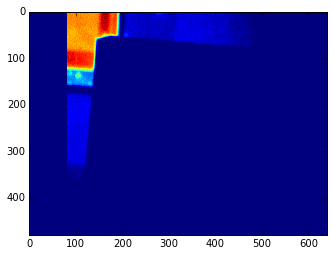

In [142]:
plt.imshow(dst)

# LINK PARA COMPARAR IMAGENES

https://gist.github.com/anonymous/e05f635946583afd222f

In [26]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err
 
def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	# s = ssim(imageA, imageB)
 
	# setup the figure
	fig = plt.figure(title)
	#plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
 
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA)#(parametro que se agrega para convertir a grises)(, cmap = plt.cm.gray))
	plt.axis("off")
 
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB)#, cmap = plt.cm.gray)
	plt.axis("off")
 
	# show the images
	plt.show()
	print m

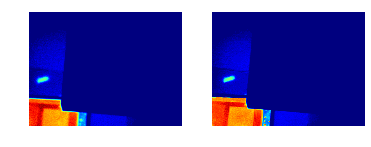

9.81249023437


In [144]:
compare_images(img,img2,'titulo')